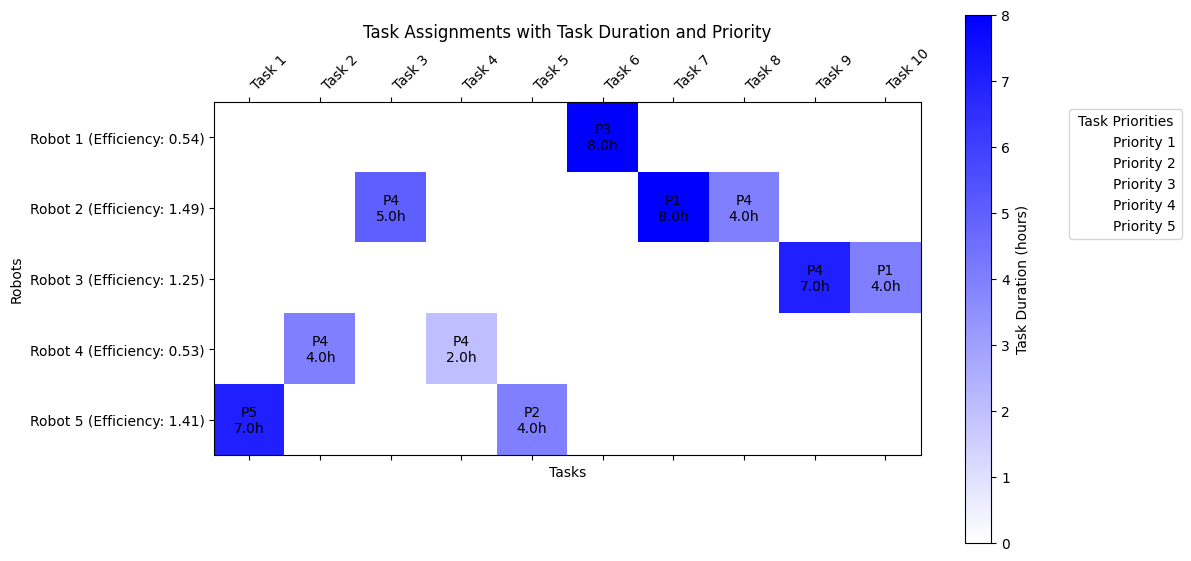

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Set random seed for reproducibility
# np.random.seed(42)

# Function to generate mock data for tasks and robots
def generate_mock_data(num_tasks=10, num_robots=5):
    task_durations = np.random.randint(1, 11, size=num_tasks)  # Random task durations between 1 and 10 hours
    task_priorities = np.random.randint(1, 6, size=num_tasks)  # Random task priorities between 1 and 5
    robot_efficiencies = np.random.uniform(0.5, 1.5, size=num_robots)  # Random robot efficiencies between 0.5 and 1.5
    return task_durations, task_priorities, robot_efficiencies




# Initialization
def initialize_population(population_size, num_tasks, num_robots):
    return [np.random.randint(0, num_robots, size=num_tasks) for _ in range(population_size)]

# Fitness Function
def calculate_fitness(individual, task_durations, task_priorities, robot_efficiencies):
    robot_times = np.zeros(len(robot_efficiencies))
    for i, robot_index in enumerate(individual):
        robot_times[robot_index] += (task_durations[i] * task_priorities[i]) / robot_efficiencies[robot_index]
    total_time = max(robot_times)
    balance = np.std(robot_times)
    fitness = 1 / (total_time + balance)  # Minimize total time and balance
    return fitness

# Tournament Selection
def tournament_selection(population, fitnesses, k=3):
    winners = []
    for _ in range(len(population)):
        tournament = np.random.choice(len(population), k, replace=False)
        best_in_tournament = tournament[np.argmax([fitnesses[i] for i in tournament])]
        winners.append(population[best_in_tournament])
    return winners

# Crossover (Single-Point Crossover)
def crossover(parents, num_tasks, offspring_size):
    offspring = []
    while len(offspring) < offspring_size:
        parent1, parent2 = np.random.choice(len(parents), 2, replace=False)
        crossover_point = np.random.randint(1, num_tasks - 1)
        child1 = np.concatenate([parents[parent1][:crossover_point], parents[parent2][crossover_point:]])
        child2 = np.concatenate([parents[parent2][:crossover_point], parents[parent1][crossover_point:]])
        offspring.extend([child1, child2])
    return offspring[:offspring_size]

# Mutation (Task Swapping)
def mutate(offspring, num_tasks, mutation_rate=0.1):
    for child in offspring:
        if np.random.rand() < mutation_rate:
            swap_points = np.random.choice(num_tasks, 2, replace=False)
            child[swap_points[0]], child[swap_points[1]] = child[swap_points[1]], child[swap_points[0]]
    return offspring

# GA Algorithm
def run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies):
    population_size = 50
    n_generations = 100
    population = initialize_population(population_size, len(task_durations), len(robot_efficiencies))

    for generation in range(n_generations):
        fitnesses = [calculate_fitness(ind, task_durations, task_priorities, robot_efficiencies) for ind in population]
        selected = tournament_selection(population, fitnesses)
        offspring_crossover = crossover(selected, len(task_durations), population_size - len(selected))
        offspring_mutation = mutate(offspring_crossover, len(task_durations))
        population = selected + offspring_mutation

    # Identify the best solution
    fitnesses = [calculate_fitness(ind, task_durations, task_priorities, robot_efficiencies) for ind in population]
    best_index = np.argmax(fitnesses)
    best_solution = population[best_index]

    return best_solution



# Improved visualization function
def visualize_assignments_improved(solution, task_durations, task_priorities, robot_efficiencies):
    grid = np.zeros((len(robot_efficiencies), len(task_durations)))
    for task_idx, robot_idx in enumerate(solution):
        grid[robot_idx, task_idx] = task_durations[task_idx]

    fig, ax = plt.subplots(figsize=(12, 6))
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "blue"])  # Custom colormap

    # Display the grid with task durations
    cax = ax.matshow(grid, cmap=cmap)
    fig.colorbar(cax, label='Task Duration (hours)')

    # Annotate each cell with task priority and duration
    for i in range(len(robot_efficiencies)):
        for j in range(len(task_durations)):
            if grid[i, j] != 0:
                ax.text(j, i, 'P'f'{task_priorities[j]}\n{grid[i, j]}h', ha='center', va='center', color='black')

    # Set the ticks and labels for tasks and robots
    ax.set_xticks(np.arange(len(task_durations)))
    ax.set_yticks(np.arange(len(robot_efficiencies)))
    ax.set_xticklabels([f'Task {i+1}' for i in range(len(task_durations))], rotation=45, ha="left")
    ax.set_yticklabels([f'Robot {i+1} (Efficiency: {eff:.2f})' for i, eff in enumerate(robot_efficiencies)])

    plt.xlabel('Tasks')
    plt.ylabel('Robots')
    plt.title('Task Assignments with Task Duration and Priority')

    # Create a legend for task priorities
    priority_patches = [mpatches.Patch(color='white', label=f'Priority {i}') for i in range(1, 6)]
    plt.legend(handles=priority_patches, bbox_to_anchor=(1.20, 1), loc='upper left', title="Task Priorities")

    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    num_tasks = 10
    num_robots = 5
    task_durations, task_priorities, robot_efficiencies = generate_mock_data(num_tasks, num_robots)

    # Run GA to find the best solution
    best_solution = run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies)

    # Visualize the initial random assignment
    visualize_assignments_improved(best_solution, task_durations, task_priorities, robot_efficiencies)
